# 2.	CARGA DE DATOS

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as sms
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.compat import lzip

In [ ]:
import pandas_datareader as pdr

In [ ]:
df = pd.read_csv("/content/Walmart(1).csv")
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [ ]:
df.rename({'Store':'Tienda', 'Date':'Fecha', 'Weekly_Sales': 'Ventasportienda',
           'Holiday_Flag': 'Vacaciones', 'Temperature': 'Temperatura', 'Fuel_Price': 'Preciocombustible',
           'CPI': 'Indicedeprecios', 'Unemployment': 'Desempleo' }, axis=1, inplace=True)

# 3.	DESCRIPCION DE VARIABLES

In [ ]:
df.dtypes

,0
Tienda,int64
Fecha,object
Ventasportienda,float64
Vacaciones,int64
Temperatura,float64
Preciocombustible,float64
Indicedeprecios,float64
Desempleo,float64


In [ ]:
# Convertir 'Tienda' a tipo categórico
df['Tienda'] = df['Tienda'].astype('category')

# Convertir 'Vacaciones' a tipo categórico
df['Vacaciones'] = df['Vacaciones'].astype('category')

# Convertir 'Fecha' a tipo datetime
df['Fecha'] = pd.to_datetime(df['Fecha'], dayfirst=True)

In [ ]:
df.dtypes

,0
Tienda,category
Fecha,datetime64[ns]
Ventasportienda,float64
Vacaciones,category
Temperatura,float64
Preciocombustible,float64
Indicedeprecios,float64
Desempleo,float64


3.1	Variables numéricas

In [ ]:
df.describe()

,Fecha,Ventasportienda,Temperatura,Preciocombustible,Indicedeprecios,Desempleo
count,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000
mean,2011-06-17 00:00:00,1.046965e+06,60.663782,3.358607,171.578394,7.999151
min,2010-02-05 00:00:00,2.099862e+05,-2.060000,2.472000,126.064000,3.879000
25%,2010-10-08 00:00:00,5.533501e+05,47.460000,2.933000,131.735000,6.891000
50%,2011-06-17 00:00:00,9.607460e+05,62.670000,3.445000,182.616521,7.874000
75%,2012-02-24 00:00:00,1.420159e+06,74.940000,3.735000,212.743293,8.622000
max,2012-10-26 00:00:00,3.818686e+06,100.140000,4.468000,227.232807,14.313000
std,NaN,5.643666e+05,18.444933,0.459020,39.356712,1.875885


3.2	Variables categóricas

In [ ]:
df.describe(include='category')

,Tienda,Vacaciones
count,6435,6435
unique,45,2
top,1,0
freq,143,5985


# 4.	DATOS PERDIDOS

In [ ]:
df.isnull().sum()

,0
Tienda,0
Fecha,0
Ventasportienda,0
Vacaciones,0
Temperatura,0
Preciocombustible,0
Indicedeprecios,0
Desempleo,0


# 5.	DATOS ATÍPICOS (OUTLIERS)

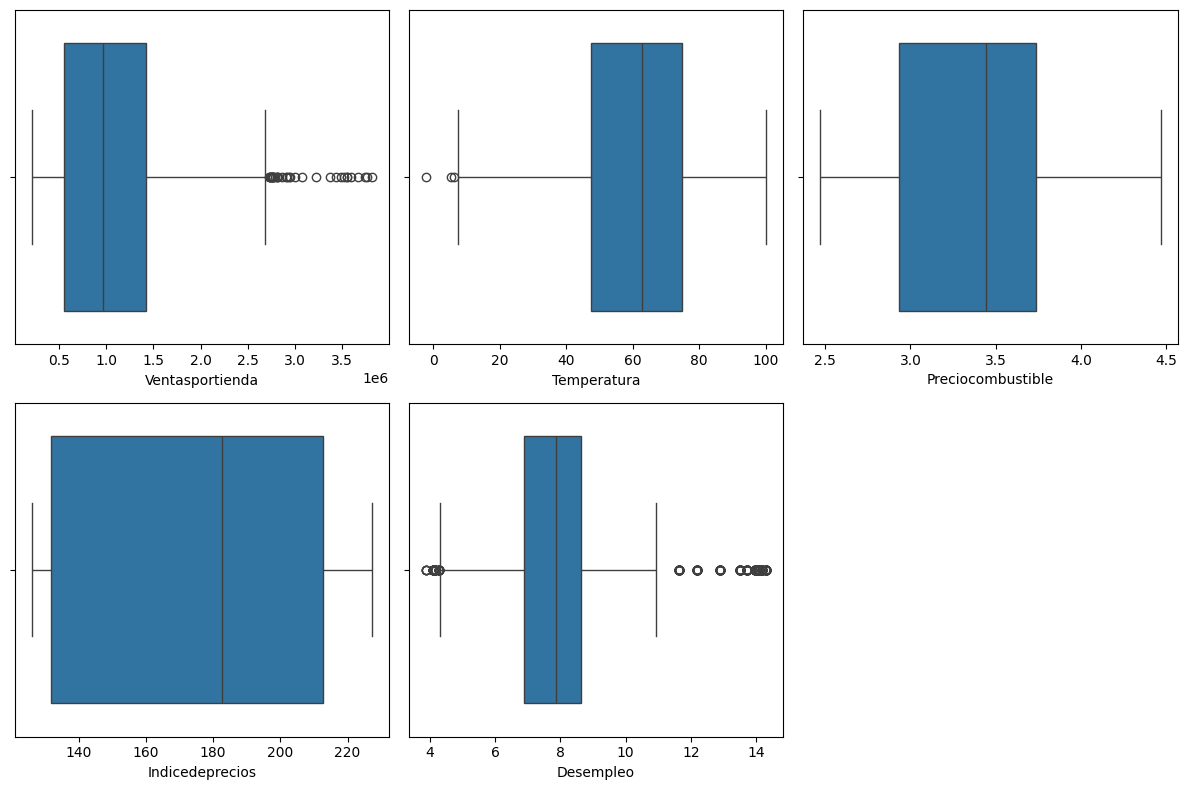

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
sns.boxplot(x=df['Ventasportienda'])
plt.subplot(2, 3, 2)
sns.boxplot(x=df['Temperatura'])
plt.subplot(2, 3, 3)
sns.boxplot(x=df['Preciocombustible'])
plt.subplot(2, 3, 4)
sns.boxplot(x=df['Indicedeprecios'])
plt.subplot(2, 3, 5)
sns.boxplot(x=df['Desempleo'])
plt.tight_layout()
plt.show()

In [ ]:
# prompt: reemplazar todos los outliers con la mediana variable por variable

import numpy as np
# Calcula la mediana de cada variable numérica
median_ventas = df['Ventasportienda'].median()
median_temperatura = df['Temperatura'].median()
median_preciocombustible = df['Preciocombustible'].median()
median_indicedeprecios = df['Indicedeprecios'].median()
median_desempleo = df['Desempleo'].median()

# Define una función para reemplazar outliers con la mediana
def replace_outliers_with_median(df, column, median):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), median, df[column])

# Aplica la función a cada variable numérica
replace_outliers_with_median(df, 'Ventasportienda', median_ventas)
replace_outliers_with_median(df, 'Temperatura', median_temperatura)
replace_outliers_with_median(df, 'Preciocombustible', median_preciocombustible)
replace_outliers_with_median(df, 'Indicedeprecios', median_indicedeprecios)
replace_outliers_with_median(df, 'Desempleo', median_desempleo)


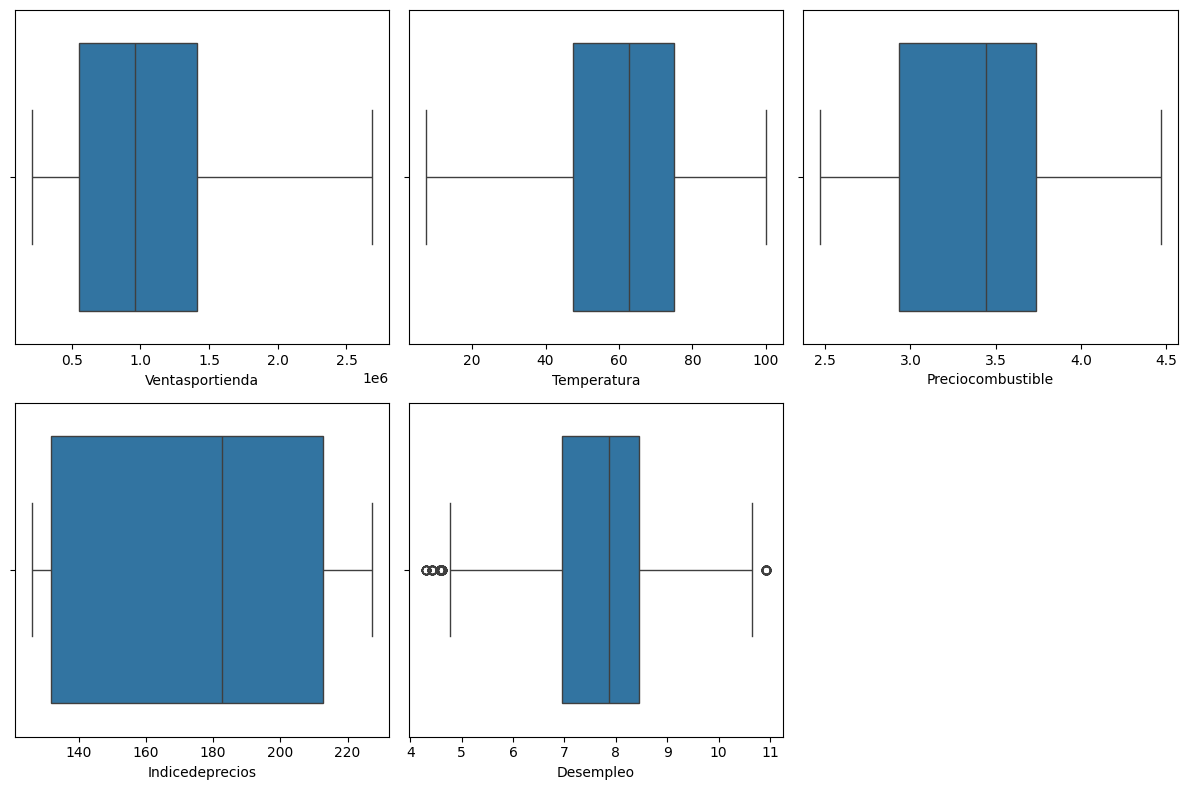

In [ ]:
# Verificar si los outliers fueron reemplazados
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
sns.boxplot(x=df['Ventasportienda'])
plt.subplot(2, 3, 2)
sns.boxplot(x=df['Temperatura'])
plt.subplot(2, 3, 3)
sns.boxplot(x=df['Preciocombustible'])
plt.subplot(2, 3, 4)
sns.boxplot(x=df['Indicedeprecios'])
plt.subplot(2, 3, 5)
sns.boxplot(x=df['Desempleo'])
plt.tight_layout()
plt.show()

#6.	DISTRIBUCIONES DE LAS VARIABLES

<Axes: xlabel='Ventasportienda', ylabel='Density'>

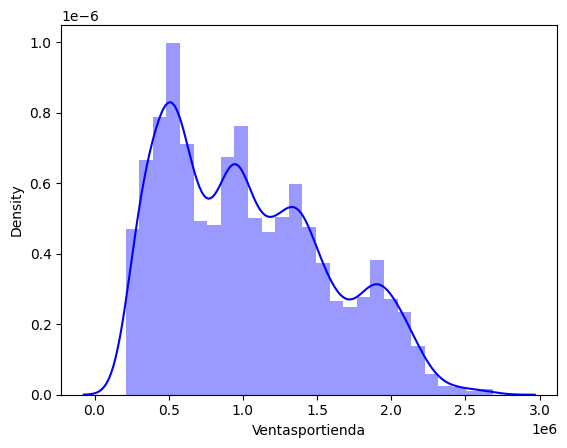

In [ ]:
sns.distplot(df['Ventasportienda'],color="blue")

<Axes: xlabel='Temperatura', ylabel='Density'>

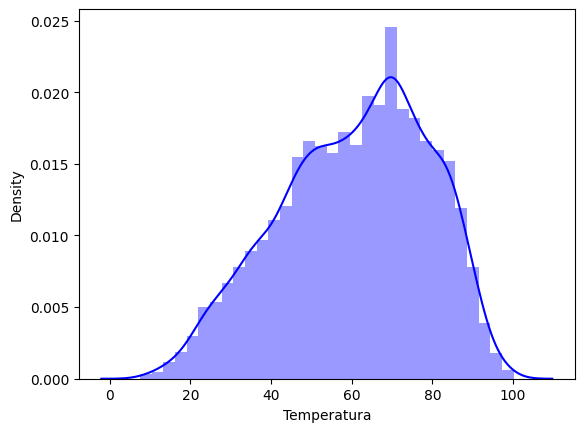

In [ ]:
sns.distplot(df['Temperatura'],color="blue")

<Axes: xlabel='Preciocombustible', ylabel='Density'>

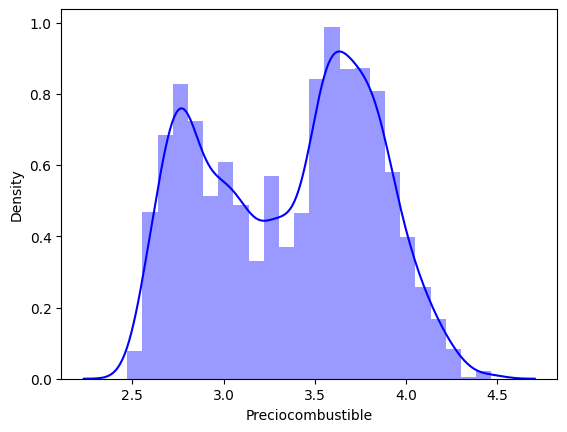

In [ ]:
sns.distplot(df['Preciocombustible'],color="blue")

<Axes: xlabel='Indicedeprecios', ylabel='Density'>

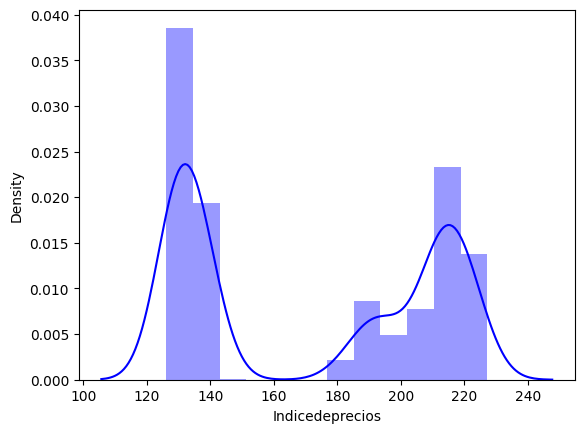

In [ ]:
sns.distplot(df['Indicedeprecios'],color="blue")

<Axes: xlabel='Desempleo', ylabel='Density'>

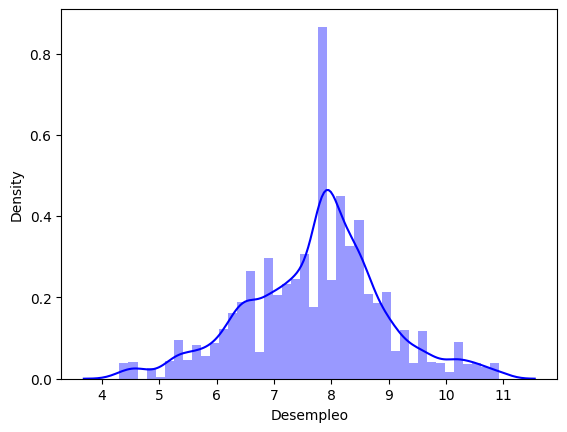

In [ ]:
sns.distplot(df['Desempleo'],color="blue")

# 7.	CORRELACIONES

In [ ]:
numerical_df = df.select_dtypes(include=['number'])
numerical_df.corr()

,Ventasportienda,Temperatura,Preciocombustible,Indicedeprecios,Desempleo
Ventasportienda,1.000000,-0.044075,0.018476,-0.069211,-0.071529
Temperatura,-0.044075,1.000000,0.144291,0.176561,0.027929
Preciocombustible,0.018476,0.144291,1.000000,-0.170642,-0.094909
Indicedeprecios,-0.069211,0.176561,-0.170642,1.000000,-0.216201
Desempleo,-0.071529,0.027929,-0.094909,-0.216201,1.000000


In [ ]:
numerical_df.corr().style.background_gradient(cmap='coolwarm')

,Ventasportienda,Temperatura,Preciocombustible,Indicedeprecios,Desempleo
Ventasportienda,1.000000,-0.044075,0.018476,-0.069211,-0.071529
Temperatura,-0.044075,1.000000,0.144291,0.176561,0.027929
Preciocombustible,0.018476,0.144291,1.000000,-0.170642,-0.094909
Indicedeprecios,-0.069211,0.176561,-0.170642,1.000000,-0.216201
Desempleo,-0.071529,0.027929,-0.094909,-0.216201,1.000000


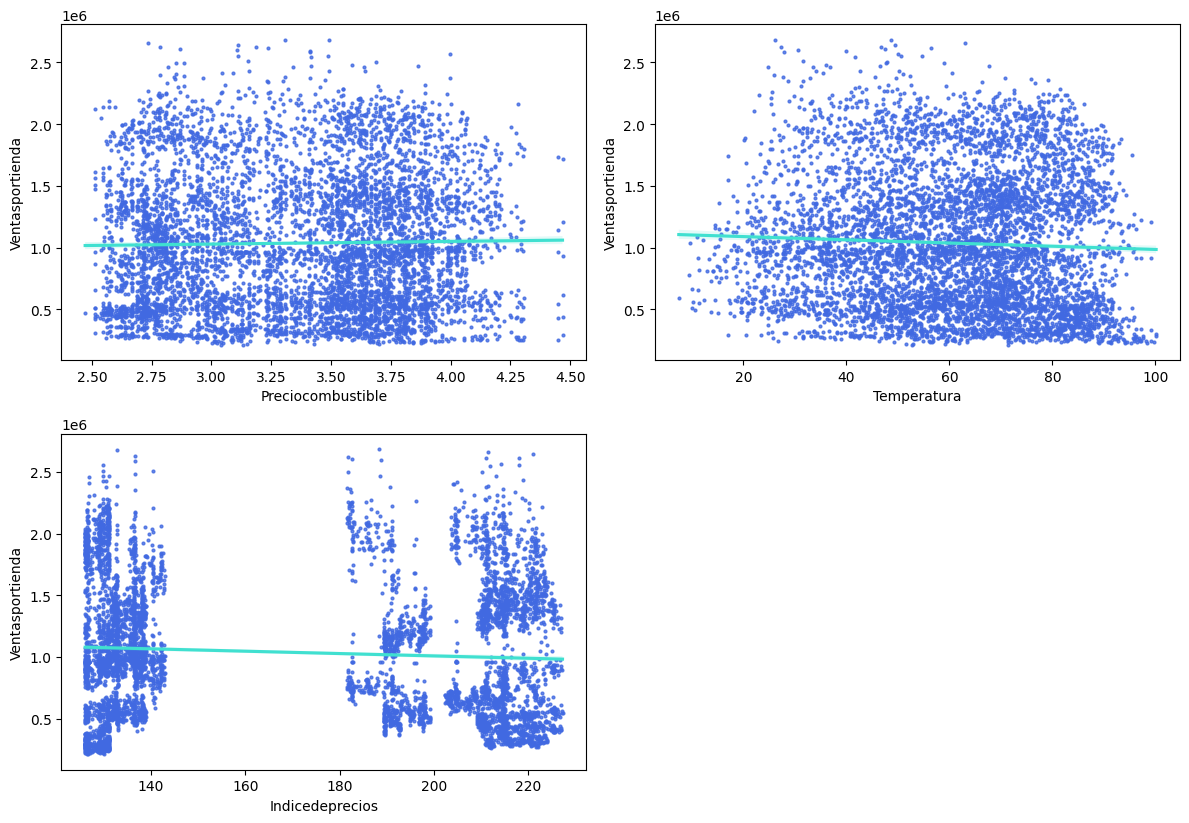

In [ ]:
# Número de las variables
n = 5
fig = plt.figure(figsize=(12,12))
# Correlaciones en pares
corr = numerical_df.corr()
#
cols = corr.nlargest(4, "Ventasportienda")["Ventasportienda"].index
# Calculate correlation
for i in np.arange(1,4):
    regline = df[cols[i]]
    ax = fig.add_subplot(3,2,i)
    sns.regplot(x=regline, y=df['Ventasportienda'], scatter_kws={"color": "royalblue", "s": 4},
                line_kws={"color": "turquoise"})
plt.tight_layout()
plt.show()

# 9.	TIPO DE MODELIZACIÓN

Análisis Econométrico de Sección Transversal Datos de panel

# 10.	VERIFICACIÓN DE SUPUESTOS

Recordemos que en datos de panel, requerimos especificar los índice para nuestra base de datos. En este caso, setearemos a fecha y al codificado de tienda como referencia.

In [ ]:
!pip install linearmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.3 MB/s eta 0:00:00


In [ ]:
from linearmodels import PooledOLS
import statsmodels.api as sm

In [ ]:
df = df.set_index(['Tienda', 'Fecha'])

In [ ]:
# Definir la variable dependiente y las independientes
Y = df['Ventasportienda']
X = df[['Vacaciones', 'Temperatura', 'Preciocombustible', 'Indicedeprecios', 'Desempleo']]
X = sm.add_constant(X)  # Agregar una constante para el intercepto

# Construcción del modelo de Pooled OLS
model_pooled_ols = PooledOLS(Y, X)
results_pooled_ols = model_pooled_ols.fit()

# Imprimir el resumen de los resultados
print(results_pooled_ols.summary)


                          PooledOLS Estimation Summary                          
Dep. Variable:        Ventasportienda   R-squared:                        0.0138
Estimator:                  PooledOLS   R-squared (Between):              0.0155
No. Observations:                6435   R-squared (Within):              -0.0055
Date:                Thu, Aug 08 2024   R-squared (Overall):              0.0138
Time:                        00:23:12   Log-likelihood                -9.407e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      17.973
Entities:                          45   P-value                           0.0000
Avg Obs:                       143.00   Distribution:                  F(5,6429)
Min Obs:                       143.00                                           
Max Obs:                       143.00   F-statistic (robust):             17.973
                            

**Homocedasticidad**

In [ ]:
# Almacenar los valores predichos y los residuos
df['fitted_values'] = results_pooled_ols.predict(X)
df['residuals'] = Y - df['fitted_values']

# Calcular los residuos estandarizados
df['standardized_residuals'] = df['residuals'] / np.std(df['residuals'])


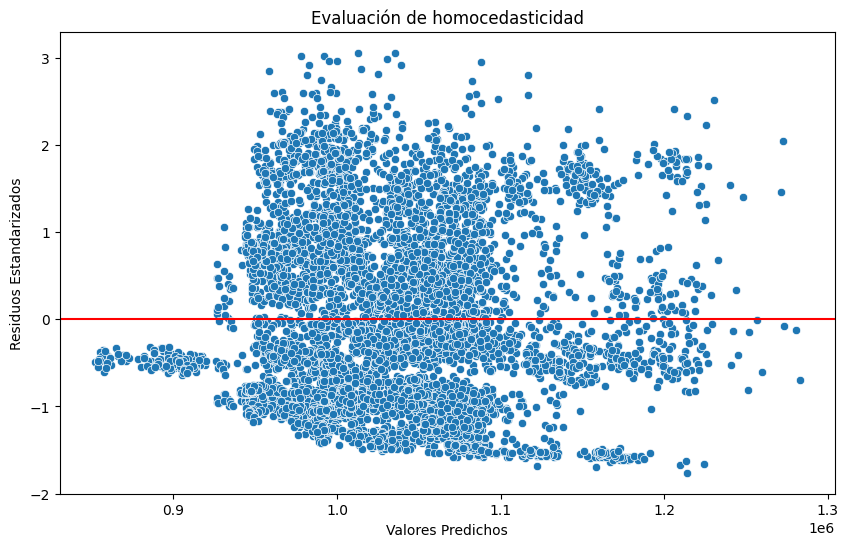

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='fitted_values', y='standardized_residuals', data=df)
plt.axhline(0, color='red')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos Estandarizados')
plt.title('Evaluación de homocedasticidad')
plt.show()


In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan

In [ ]:
# Realizar el test de Breusch-Pagan
bp_test = het_breuschpagan(df['residuals'], X)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, bp_test)))


{'LM Statistic': 127.24740617597543, 'LM-Test p-value': 9.132027083841304e-26, 'F-Statistic': 25.938670299349678, 'F-Test p-value': 5.119039171221833e-26}


**No- autocorrelación**

In [ ]:
from statsmodels.stats.stattools import durbin_watson

# Calcular el estadístico de Durbin-Watson
dw_statistic = durbin_watson(df['residuals'])
print(f"Durbin-Watson statistic: {dw_statistic}")

Durbin-Watson statistic: 0.12203891407462739


# 11.	MODELO DEFINITIVO

**Modelo de Efectos Fijos "fixed effects"**

In [ ]:
from linearmodels import PanelOLS

In [ ]:
# prompt: modelo de efectos fijos

# Modelo de Efectos Fijos
model_fe = PanelOLS(Y, X, entity_effects=True)
results_fe = model_fe.fit()
print(results_fe)

                          PanelOLS Estimation Summary                           
Dep. Variable:        Ventasportienda   R-squared:                        0.0136
Estimator:                   PanelOLS   R-squared (Between):             -0.1266
No. Observations:                6435   R-squared (Within):               0.0136
Date:                Thu, Aug 08 2024   R-squared (Overall):             -0.1153
Time:                        00:23:42   Log-likelihood                -8.596e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      17.656
Entities:                          45   P-value                           0.0000
Avg Obs:                       143.00   Distribution:                  F(5,6385)
Min Obs:                       143.00                                           
Max Obs:                       143.00   F-statistic (robust):             17.656
                            

**Modelo de Efectos Aleatorios "random effects"**

In [ ]:
from linearmodels import RandomEffects

In [ ]:
# Modelo de efectos aleatorios
model_re = RandomEffects(Y, X)
results_re = model_re.fit()

print(results_re)

                        RandomEffects Estimation Summary                        
Dep. Variable:        Ventasportienda   R-squared:                        0.0129
Estimator:              RandomEffects   R-squared (Between):             -0.0834
No. Observations:                6435   R-squared (Within):               0.0135
Date:                Thu, Aug 08 2024   R-squared (Overall):             -0.0756
Time:                        01:03:32   Log-likelihood                -8.599e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      16.837
Entities:                          45   P-value                           0.0000
Avg Obs:                       143.00   Distribution:                  F(5,6429)
Min Obs:                       143.00                                           
Max Obs:                       143.00   F-statistic (robust):             16.837
                            

**Test de Haussman**

In [ ]:
import numpy.linalg as la
from scipy import stats
import numpy as np

In [ ]:
def hausman(fe, re):
    b = fe.params
    B = re.params
    v_b = fe.cov
    v_B = re.cov
    df = b[np.abs(b) < 1e8].size
    chi2 = np.dot((b - B).T, la.inv(v_b - v_B).dot(b - B))

    pval = stats.chi2.sf(chi2, df)
    return chi2, df, pval

In [ ]:
hausman = hausman(results_fe, results_re)

In [ ]:
print('chi-Squared: ' + str(hausman[0]))
print('degrees of freedom: ' + str(hausman[1]))
print('p-Value:' + str(hausman[2]))

chi-Squared: 4.808730647858034
degrees of freedom: 6
p-Value:0.5685686445405091


# 12.	COMPARACIÓN VALORES MODELO CON VALORES REALES

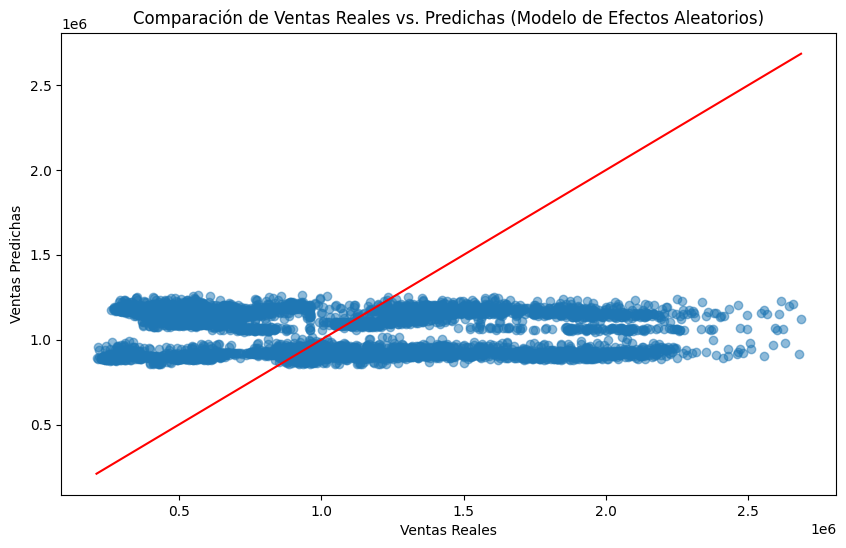

In [ ]:
# Obtener los valores predichos del modelo de efectos aleatorios
df['predicted_sales'] = results_re.predict(X)

# Graficar los valores reales vs. los valores predichos
plt.figure(figsize=(10, 6))
plt.scatter(df['Ventasportienda'], df['predicted_sales'], alpha=0.5)
plt.xlabel('Ventas Reales')
plt.ylabel('Ventas Predichas')
plt.title('Comparación de Ventas Reales vs. Predichas (Modelo de Efectos Aleatorios)')
plt.plot([df['Ventasportienda'].min(), df['Ventasportienda'].max()], [df['Ventasportienda'].min(), df['Ventasportienda'].max()], color='red')
plt.show()

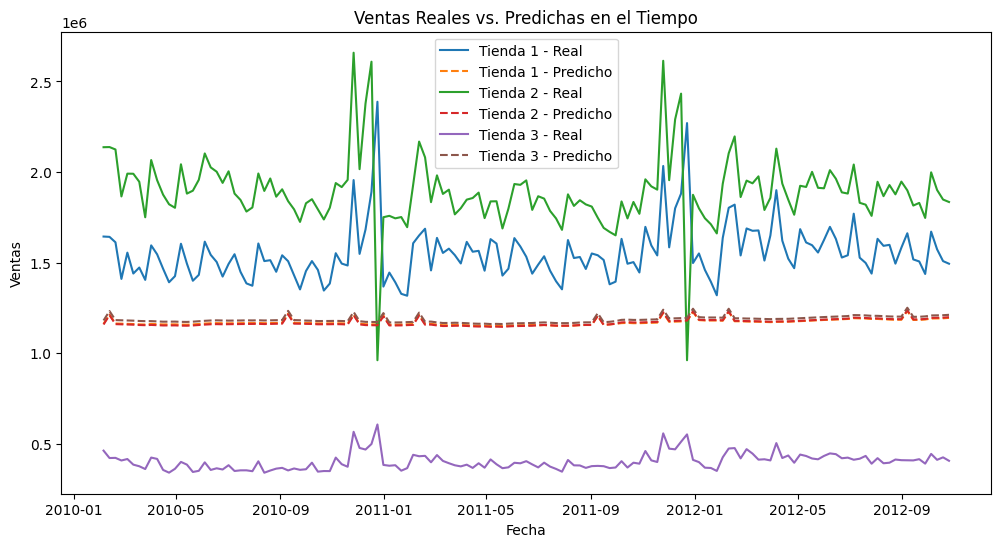

In [ ]:
# prompt: COMPARACIÓN VALORES MODELO CON VALORES REALES en el tiempo

import matplotlib.pyplot as plt
# Predecir valores usando el modelo de efectos aleatorios (ya que fue el elegido según el test de Hausman)
df['predicted_sales'] = results_re.predict(X)

# Graficar las ventas reales vs. las ventas predichas para algunas tiendas seleccionadas
plt.figure(figsize=(12, 6))

for store in df.index.get_level_values('Tienda').unique()[:3]:  # Seleccionar las primeras 3 tiendas
    store_data = df.loc[store]
    plt.plot(store_data.index.get_level_values('Fecha'), store_data['Ventasportienda'], label=f'Tienda {store} - Real')
    plt.plot(store_data.index.get_level_values('Fecha'), store_data['predicted_sales'], label=f'Tienda {store} - Predicho', linestyle='--')

plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('Ventas Reales vs. Predichas en el Tiempo')
plt.legend()
plt.show()


# 13.	CONCLUSIONES

A pesar de haber seguido correctamente el proceso de modelado, los resultados sugieren que las variables seleccionadas pueden no ser adecuadas para explicar las ventas por tienda. El bajo R-cuadrado indica que el modelo tiene dificultades para capturar la variabilidad en las ventas, y la falta de significancia en algunas variables, como la temperatura, refuerza la idea de que los factores incluidos podrían no ser los más relevantes. Esto sugiere que es necesario revisar y posiblemente ajustar las variables consideradas para mejorar la precisión y relevancia del modelo.